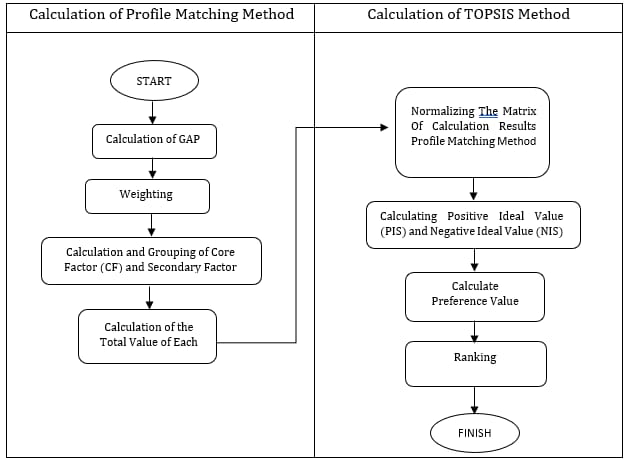

# Profile Matching

https://www.youtube.com/watch?v=fsUpntVuTUM

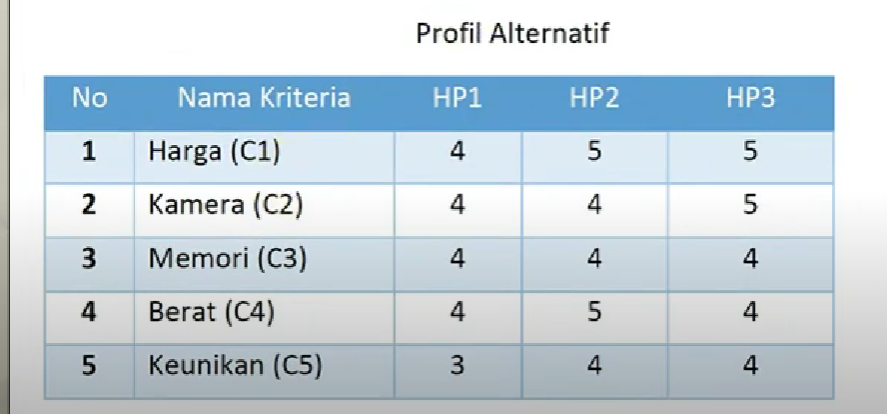

In [26]:
weights=[[4,4,4,4,3],[5,4,4,5,4],[5,5,4,4,4
]]

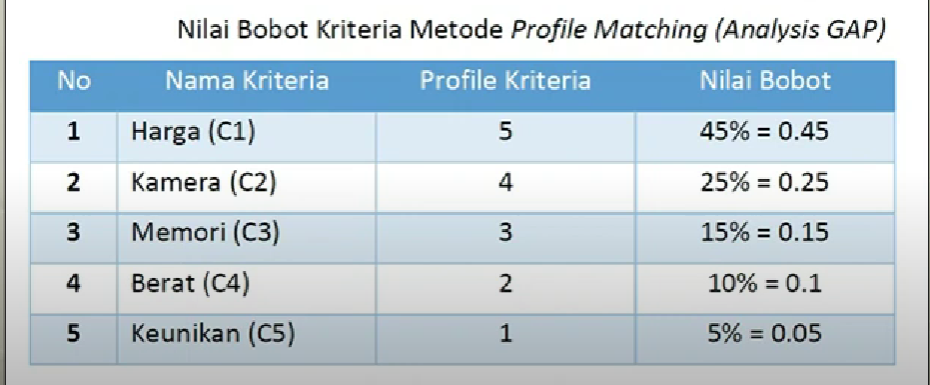

In [27]:
# We make target for each criteria first :
# Harga = 5
# Kamera = 4
# Memori = 3
# Berat = 2
# Keunikan = 1




In [28]:
import numpy as np
target=np.array([5,4,3,2,1])

In [29]:
target

array([5, 4, 3, 2, 1])

In [30]:
# Define the gap between the weights and the target
alt=np.array(weights)
alt_=alt.copy()
for i in range(alt.shape[0]) :
  for j in range(alt.shape[1]) :
    alt_[i][j]= alt[i][j]-target[j]


In [31]:
alt_

array([[-1,  0,  1,  2,  2],
       [ 0,  0,  1,  3,  3],
       [ 0,  1,  1,  2,  3]])

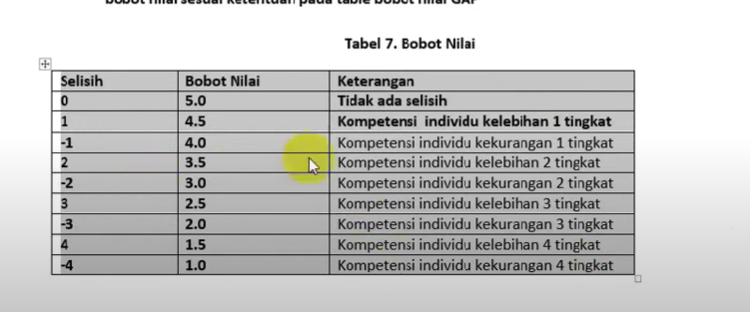

In [32]:
# Weighting follow standard above
standard_value={
    0 : 6,
    1:5.5,
    -1 : 5,
    2 : 4.5,
    -2 : 4.0,
    3 : 3.5,
    -3 :3.0,
    4:2.5,
    -4:2,
    5 : 1.5,
    -5 : 1

}
# Change the value to the standard_value weighting
weighted_matrix=alt_.copy().astype(float)
for i in range(alt.shape[0]) :
  for j in range(alt.shape[1]) :
    weighted_matrix[i][j]=standard_value[alt_[i][j]]


In [33]:
weighted_matrix

array([[5. , 6. , 5.5, 4.5, 4.5],
       [6. , 6. , 5.5, 3.5, 3.5],
       [6. , 5.5, 5.5, 4.5, 3.5]])

In [36]:
# Calculating final_score

global_weights=[0.45,0.2500,0.15,0.1,0.05]
final_score=[]

for i in range(alt.shape[0]) :
  temp=0
  for j in range(alt.shape[1]) :
    temp+= weighted_matrix[i][j]*global_weights[j]
  final_score.append(temp)

In [37]:
final_score

[5.25, 5.55, 5.525]

## Different source using Core Factor and Secondary Factor

https://www.youtube.com/watch?v=FHx7v-GCU2s


In [40]:
# core factor = Harga, Kamera, memori (60%)
# Secondary factor = Berat, Keunikan (40%)
global_weights=[0.6,0.6,0.6,0.4,0.4]
NCF=[]
NSF=[]
for i in range(alt.shape[0]) :
  temp=0
  cf=[]
  sf=[]
  for j in range(alt.shape[1]) :
    if global_weights[j]==0.6 :
      cf.append(weighted_matrix[i][j])
    else :
      sf.append(weighted_matrix[i][j])
  NCF.append(np.average(np.array(cf)))
  NSF.append(np.average(np.array(sf)))


In [41]:
# Calculate final_score
final_score=[]

for i in range(len(NSF)) :
  final_score.append(NCF[i]*0.6+0.4*NSF[i])

In [42]:
final_score

[5.1, 4.8999999999999995, 5.0]

### Try the code with the actual source

I have checked this code with the actual source problem https://colab.research.google.com/drive/18ClgQDh3FsDKZisvqpPIsPCd8_p3I44T?usp=sharing **The Code Is Correct**

# Profile Matching with subcriterion

https://www.youtube.com/watch?v=F8RdlVwu6fI&t=1958s

In [153]:
aspek_kecerdasan=[[2,4,3,2,3,4,3,2,3,2],[3,4,3,3,4,4,2,3,3,4],[4,4,3,4,3,3,3,2,4,2],
                  [3,3,3,3,3,2,3,2,4,3],[3,3,3,3,3,3,3,3,2,2],[2,3,3,2,2,3,2,3,3,3],
                  [1,2,3,3,3,3,3,3,3,3]]

aspek_sikap_kerja=[[2,4,3,2,3,4],[5,4,3,3,4,4],[4,5,3,3,4,3],[2,3,5,4,3,2]
                   ,[3,2,4,5,3,3],[2,4,2,2,5,3],[4,2,3,2,3,5]]

nilai_aspek_perilaku = [[1,4,3,2],[5,1,2,3],[4,2,1,3],[2,3,4,1],[3,2,1,5],[2,1,2,2],[1,2,3,2]]

In [154]:
array_aspek_kecerdasan=np.array(aspek_kecerdasan)
array_aspek_sikap_kerja=np.array(aspek_sikap_kerja)
array_aspek_perilaku=np.array(nilai_aspek_perilaku)

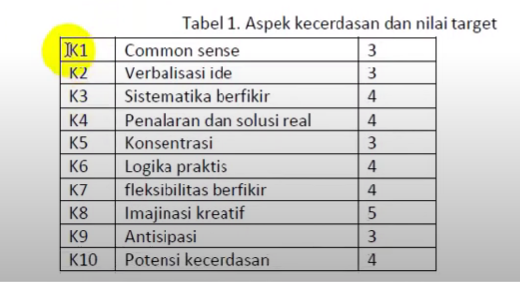

In [155]:
nilai_aspek_perilaku

[[1, 4, 3, 2],
 [5, 1, 2, 3],
 [4, 2, 1, 3],
 [2, 3, 4, 1],
 [3, 2, 1, 5],
 [2, 1, 2, 2],
 [1, 2, 3, 2]]

In [156]:
target_kecerdasan=[3,3,4,4,3,4,4,5,3,4]
target_sikap_kerja=[3,4,2,3,3,5]
target_aspek_perilaku=[3,4,2,3]

In [157]:

for i in range(array_aspek_kecerdasan.shape[0]) :
  for j in range(array_aspek_kecerdasan.shape[1]) :
    array_aspek_kecerdasan[i][j]=array_aspek_kecerdasan[i][j] - target_kecerdasan[j]
for i in range(array_aspek_sikap_kerja.shape[0]) :
  for j in range(array_aspek_sikap_kerja.shape[1]) :
    array_aspek_sikap_kerja[i][j]=array_aspek_sikap_kerja[i][j] - target_sikap_kerja[j]
for i in range(array_aspek_perilaku.shape[0]) :
  for j in range(array_aspek_perilaku.shape[1]) :
    array_aspek_perilaku[i][j]=array_aspek_perilaku[i][j] - target_aspek_perilaku[j]

In [158]:
array_aspek_kecerdasan

array([[-1,  1, -1, -2,  0,  0, -1, -3,  0, -2],
       [ 0,  1, -1, -1,  1,  0, -2, -2,  0,  0],
       [ 1,  1, -1,  0,  0, -1, -1, -3,  1, -2],
       [ 0,  0, -1, -1,  0, -2, -1, -3,  1, -1],
       [ 0,  0, -1, -1,  0, -1, -1, -2, -1, -2],
       [-1,  0, -1, -2, -1, -1, -2, -2,  0, -1],
       [-2, -1, -1, -1,  0, -1, -1, -2,  0, -1]])

In [159]:
array_aspek_perilaku

array([[-2,  0,  1, -1],
       [ 2, -3,  0,  0],
       [ 1, -2, -1,  0],
       [-1, -1,  2, -2],
       [ 0, -2, -1,  2],
       [-1, -3,  0, -1],
       [-2, -2,  1, -1]])

In [160]:
# Weighting follow standard above
standard_value={
    0 : 5,
    1:4.5,
    -1 : 4,
    2 : 3.5,
    -2 : 3.0,
    3 : 2.5,
    -3 :2.0,
    4:1.5,
    -4:1,


}
weighted_array_aspek_kecerdasan=np.array(aspek_kecerdasan,dtype=float)
weighted_array_aspek_sikap_kerja=np.array(aspek_sikap_kerja,dtype=float)
weighted_array_aspek_perilaku=np.array(nilai_aspek_perilaku,dtype=float)
for i in range(array_aspek_kecerdasan.shape[0]) :
  for j in range(array_aspek_kecerdasan.shape[1]) :
    weighted_array_aspek_kecerdasan[i][j]=standard_value[array_aspek_kecerdasan[i][j]]
for i in range(array_aspek_sikap_kerja.shape[0]) :
  for j in range(array_aspek_sikap_kerja.shape[1]) :
    weighted_array_aspek_sikap_kerja[i][j]=standard_value[array_aspek_sikap_kerja[i][j]]
for i in range(array_aspek_perilaku.shape[0]) :
  for j in range(array_aspek_perilaku.shape[1]) :
    weighted_array_aspek_perilaku[i][j]=standard_value[array_aspek_perilaku[i][j]]

In [161]:
weighted_array_aspek_sikap_kerja

array([[4. , 5. , 4.5, 4. , 5. , 4. ],
       [3.5, 5. , 4.5, 5. , 4.5, 4. ],
       [4.5, 4.5, 4.5, 5. , 4.5, 3. ],
       [4. , 4. , 2.5, 4.5, 5. , 2. ],
       [5. , 3. , 3.5, 3.5, 5. , 3. ],
       [4. , 5. , 5. , 4. , 3.5, 3. ],
       [4.5, 3. , 4.5, 4. , 5. , 5. ]])

In [162]:
weighted_array_aspek_kecerdasan

array([[4. , 4.5, 4. , 3. , 5. , 5. , 4. , 2. , 5. , 3. ],
       [5. , 4.5, 4. , 4. , 4.5, 5. , 3. , 3. , 5. , 5. ],
       [4.5, 4.5, 4. , 5. , 5. , 4. , 4. , 2. , 4.5, 3. ],
       [5. , 5. , 4. , 4. , 5. , 3. , 4. , 2. , 4.5, 4. ],
       [5. , 5. , 4. , 4. , 5. , 4. , 4. , 3. , 4. , 3. ],
       [4. , 5. , 4. , 3. , 4. , 4. , 3. , 3. , 5. , 4. ],
       [3. , 4. , 4. , 4. , 5. , 4. , 4. , 3. , 5. , 4. ]])

In [143]:
weighted_array_aspek_perilaku

array([[3. , 5. , 4.5, 4. ],
       [3.5, 2. , 5. , 5. ],
       [4.5, 3. , 4. , 5. ],
       [4. , 4. , 3.5, 3. ],
       [5. , 3. , 4. , 3.5],
       [4. , 2. , 5. , 4. ],
       [3. , 3. , 4.5, 4. ]])

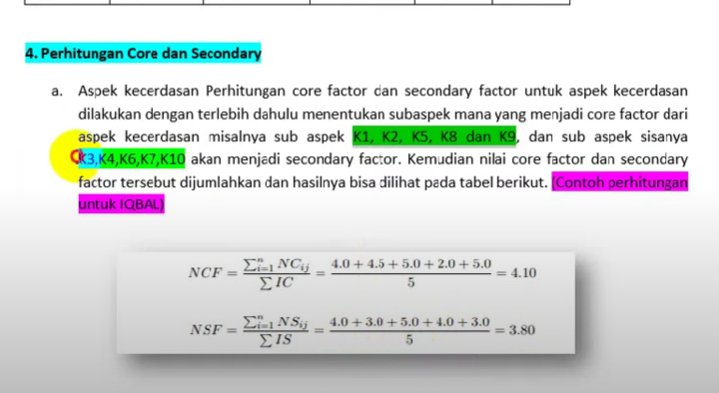

In [144]:
# CF for Kecerdasan : K1,K2,K5,K8,K9
#CF for sikap kerja : S1,S2,S5
# CF for perilaku : P1,P2

NCF_kecerdasan=[]
NCF_sikap_perilaku=[]
NCF_sikap_kerja =[]
NSF_kecerdasan=[]
NSF_sikap_perilaku=[]
NSF_sikap_kerja =[]


In [145]:
for i in range(array_aspek_kecerdasan.shape[0]) :
  ncf=[]
  nsf=[]
  for j in range(array_aspek_kecerdasan.shape[1]) :
    if j in [0,1,4,7,8] :
      ncf.append(weighted_array_aspek_kecerdasan[i][j])
    else :
      nsf.append(weighted_array_aspek_kecerdasan[i][j])
  NCF_kecerdasan.append(np.average(ncf))
  NSF_kecerdasan.append(np.average(nsf))
for i in range(array_aspek_sikap_kerja.shape[0]) :
  ncf=[]
  nsf=[]
  for j in range(array_aspek_sikap_kerja.shape[1]) :
    if j in (0,1,4) :
      ncf.append(weighted_array_aspek_sikap_kerja[i][j])
    else :
      nsf.append(weighted_array_aspek_sikap_kerja[i][j])
  NCF_sikap_kerja.append(np.average(ncf))
  NSF_sikap_kerja.append(np.average(nsf))
for i in range(array_aspek_perilaku.shape[0]) :
  ncf=[]
  nsf=[]
  for j in range(array_aspek_perilaku.shape[1]) :
    if j in [0,1] :
      ncf.append(weighted_array_aspek_perilaku[i][j])
    else :
      nsf.append(weighted_array_aspek_perilaku[i][j])
  NCF_sikap_perilaku.append(np.average(ncf))
  NSF_sikap_perilaku.append(np.average(nsf))

In [172]:
NCF_sikap_kerja

[4.666666666666667,
 4.333333333333333,
 4.5,
 4.333333333333333,
 4.333333333333333,
 4.166666666666667,
 4.166666666666667]

In [173]:
NSF_sikap_kerja

[4.166666666666667, 4.5, 4.166666666666667, 3.0, 3.3333333333333335, 4.0, 4.5]

In [148]:
# Calualting weight of NCF and NSF (60:40)
final_kecerdasan_skor=[]
final_aspek_perilaku_skor=[]
final_sikap_kerja_skor=[]
for i in range(len(NCF_kecerdasan)) :
  final_kecerdasan_skor.append(NCF_kecerdasan[i]*0.6+NSF_kecerdasan[i]*0.4)
for i in range(len(NCF_sikap_kerja)) :
  final_sikap_kerja_skor.append(NCF_sikap_kerja[i]*0.6+NSF_sikap_kerja[i]*0.4)
for i in range(len(NCF_sikap_perilaku)) :
   final_aspek_perilaku_skor.append(NCF_sikap_perilaku[i]*0.6+NSF_sikap_perilaku[i]*0.4)


In [169]:
final_kecerdasan_skor

[3.9799999999999995, 4.32, 4.06, 4.1, 4.16, 3.96, 4.0]

In [170]:
final_sikap_kerja_skor

[4.466666666666667,
 4.3999999999999995,
 4.366666666666667,
 3.8,
 3.933333333333333,
 4.1,
 4.3]

In [171]:
final_aspek_perilaku_skor

[4.1, 3.65, 4.05, 3.7, 3.9, 3.5999999999999996, 3.5]

In [167]:
# Perangkinan (N Kecerdasan* 20% + N sikap kerja* 30% = N perilaku *50%)
final_score=[]

for i in range(len(final_kecerdasan_skor)) :
  final_score.append(final_kecerdasan_skor[i]*0.2 + final_aspek_perilaku_skor[i] * 0.5 + final_sikap_kerja_skor[i] * 0.3 )

In [168]:
final_score

[4.186,
 4.009,
 4.147,
 3.8099999999999996,
 3.9619999999999997,
 3.821999999999999,
 3.84]

The are so many mistake in the source video, but i do think this code is work and well